In [124]:
#tf image preprocessor for image resize and process image in batch - mini batch 
# image dataset taken fromm https://laurencemoroney.com/datasets.html
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

In [125]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [126]:
path_ho = os.path.join('../data/horse-or-human/horses')
path_hu = os.path.join('../data/horse-or-human/humans')

In [127]:
horses= os.listdir(path_ho)
humans = os.listdir(path_hu)
print(horses[:5])
print(humans[:5])

['horse43-5.png', 'horse06-5.png', 'horse20-6.png', 'horse04-7.png', 'horse41-7.png']
['human17-22.png', 'human10-17.png', 'human10-03.png', 'human07-27.png', 'human09-22.png']


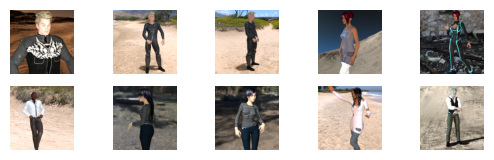

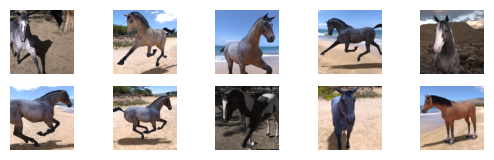

In [128]:
for i in range(10):
    sp = plt.subplot(5,5 , i+1)
    img_human_path = os.path.join(path_hu,humans[i])
    img = mpimg.imread(img_human_path)
    sp.axis('off')
    plt.imshow(img)
plt.show()

for i in range(10):
    sp = plt.subplot(5,5 , i+1)
    img_horse_path = os.path.join(path_ho,horses[i])
    img = mpimg.imread(img_horse_path)
    sp.axis('off')
    plt.imshow(img)
plt.show()

In [64]:
model = Sequential([
    Conv2D(16, (3,3), activation = 'relu', input_shape=(300,300,3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3) , activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3) , activation = 'relu'),
    MaxPooling2D(2,2),
    #Fully Connected layer
    Flatten(),
    Dense(128, activation ='relu'),
    Dense(1 , activation='sigmoid')
])

In [65]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 33, 33, 64)       

In [69]:
model.compile(optimizer=Adam() , loss = BinaryCrossentropy())

In [74]:
# load image using tf preprocessor
path = '../data/horse-or-human'
train_datagen = ImageDataGenerator(rescale = 1/255)
train_generator = train_datagen.flow_from_directory(
    path,
    target_size = (300,300),
    batch_size = 128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [76]:
# Train the model
model.fit(train_generator , steps_per_epoch = 8 , epochs =15 , verbose =1)

Train for 8 steps
Epoch 1/15
8/8 [==============================] - 192s 24s/step - loss: 0.6255
Epoch 2/15
8/8 [==============================] - 150s 19s/step - loss: 0.3219
Epoch 3/15
8/8 [==============================] - 147s 18s/step - loss: 0.1690
Epoch 4/15
8/8 [==============================] - 247s 31s/step - loss: 0.1257
Epoch 5/15
8/8 [==============================] - 218s 27s/step - loss: 0.0858
Epoch 6/15
8/8 [==============================] - 183s 23s/step - loss: 0.0801
Epoch 7/15
8/8 [==============================] - 200s 25s/step - loss: 0.0412
Epoch 8/15
8/8 [==============================] - 164s 20s/step - loss: 0.0423
Epoch 9/15
8/8 [==============================] - 148s 19s/step - loss: 0.0214
Epoch 10/15
8/8 [==============================] - 182s 23s/step - loss: 0.0123
Epoch 11/15
8/8 [==============================] - 232s 29s/step - loss: 0.0269
Epoch 12/15
8/8 [==============================] - 182s 23s/step - loss: 0.0268
Epoch 13/15
8/8 [==============

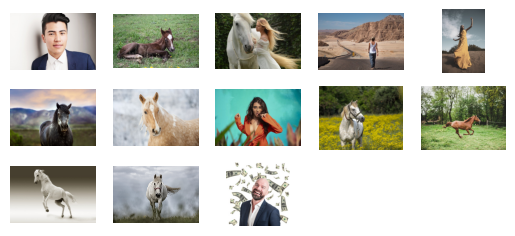

model-g2dfcc0205_640.jpg  ->  Human
animal-gf625fbe0d_640.jpg  ->  Horse
woman-gf60048dc2_640.jpg  ->  Horse
woman-gfc16e282d_640.jpg  ->  Horse
woman-g1eafa069f_640.jpg  ->  Human
horse-g8405bbca3_640.jpg  ->  Human
horse-gfddcf7d91_640.jpg  ->  Human
fashion-model-ge167b69f5_640.jpg  ->  Horse
white-horse-g98b804244_640.jpg  ->  Human
animal-g4749ca9e9_640.jpg  ->  Horse
horse_test.jpg  ->  Human
horse_1.jpg  ->  Human
business-g5cd80ba21_640.jpg  ->  Human


In [131]:
path  = '../data/Test/'
files = os.listdir(path)
j = 0
for i in files:
    if i.startswith('.'):
        continue;
    j= j+1
    img_path =  os.path.join(path,i)
    sp = plt.subplot(5,5,j )
    im = mpimg.imread(img_path)
    sp.axis('off')
    plt.imshow(im)
plt.show()

for i in files:
    if i.startswith('.'):
        continue;
    img_path =  os.path.join(path,i)
    img = load_img(img_path ,target_size=(300, 300))
    x = img_to_array(img)
    x /=128
    x = np.expand_dims(x , axis =0)
    x = np.vstack([x])
    val = model.predict(x , batch_size=1)
    print(i ," -> ", end = ' ')
    if val > 0.5:
        print('Human' )
    else:
        print('Horse')


In [ ]:
#clean up once done
import os, signal
os.kill(os.getpid(), signal.SIGKILL)